In [1]:
import pandas as pd
from scipy import stats
import numpy as np


In [2]:
breast_cancer_df = pd.read_csv('breast-cancer.csv')
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
print("Breast Cancer Dataset - Head:")
print(breast_cancer_df.head())

print("\nStroke Dataset - Head:")
print(stroke_df.head())

Breast Cancer Dataset - Head:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_wo

In [4]:
print("Breast Cancer Dataset Info:")
print(breast_cancer_df.info())

print("\nStroke Dataset Info:")
print(stroke_df.info())

Breast Cancer Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14

**DATA PREPROCESSING** 

DATA CLEANING

In [5]:
print("Missing values in Breast Cancer Dataset:")
print(breast_cancer_df.isnull().sum())

print("\nMissing values in Stroke Dataset:")
print(stroke_df.isnull().sum())


Missing values in Breast Cancer Dataset:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Missing values in

In [6]:
print("Duplicate rows in Breast Cancer Dataset:", breast_cancer_df.duplicated().sum())
print("\nDuplicate rows in Stroke Dataset:", stroke_df.duplicated().sum())


Duplicate rows in Breast Cancer Dataset: 0

Duplicate rows in Stroke Dataset: 0


In [ ]:
def detect_outliers_zscore(df, threshold=3):
    numeric_cols = df.select_dtypes(include=[np.number])
    z_scores = np.abs(stats.zscore(numeric_cols, nan_policy='omit'))
    outliers = (z_scores > threshold).sum()
    return outliers

print("\nOutliers in Breast Cancer Dataset (Z-score > 3):")
print(detect_outliers_zscore(breast_cancer_df))

print("\nOutliers in Stroke Dataset (Z-score > 3):")
print(detect_outliers_zscore(stroke_df))


Outliers in Breast Cancer Dataset (Z-score > 3):
id                         11
radius_mean                 5
texture_mean                4
perimeter_mean              7
area_mean                   8
smoothness_mean             5
compactness_mean            9
concavity_mean              9
concave points_mean         6
symmetry_mean               5
fractal_dimension_mean      7
radius_se                   7
texture_se                  9
perimeter_se                8
area_se                     6
smoothness_se               7
compactness_se             12
concavity_se                6
concave points_se           6
symmetry_se                11
fractal_dimension_se       10
radius_worst                6
texture_worst               4
perimeter_worst             6
area_worst                 10
smoothness_worst            3
compactness_worst          10
concavity_worst             7
concave points_worst        0
symmetry_worst              9
fractal_dimension_worst     9
dtype: int64

Outlie

In [8]:

stroke_df['bmi'].fillna(stroke_df['bmi'].median(), inplace=True)

print(stroke_df.isnull().sum())


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [9]:

def cap_outliers(df, col):
    lower_limit = df[col].quantile(0.01)
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])


for col in breast_cancer_df.select_dtypes(include=[np.number]).columns:
    cap_outliers(breast_cancer_df, col)

for col in ['avg_glucose_level', 'bmi']:
    cap_outliers(stroke_df, col)

print("Outliers handled in Breast Cancer Dataset.")
print("Outliers handled in Stroke Dataset.")


Outliers handled in Breast Cancer Dataset.
Outliers handled in Stroke Dataset.


Encoding Categorical Values

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


le = LabelEncoder()
breast_cancer_df['diagnosis'] = le.fit_transform(breast_cancer_df['diagnosis'])


stroke_df['gender'] = le.fit_transform(stroke_df['gender'])
stroke_df['ever_married'] = le.fit_transform(stroke_df['ever_married'])
stroke_df['Residence_type'] = le.fit_transform(stroke_df['Residence_type'])

stroke_df = pd.get_dummies(stroke_df, columns=['work_type', 'smoking_status'], drop_first=True)


print("Categorical variables encoded in Breast Cancer Dataset:")
print(breast_cancer_df.head())

print("\nCategorical variables encoded in Stroke Dataset:")
print(stroke_df.head())


Categorical variables encoded in Breast Cancer Dataset:
           id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0    842302.0          1        17.99       10.9304          122.80   
1    842517.0          1        20.57       17.7700          132.90   
2  84300903.0          1        19.69       21.2500          130.00   
3  84348301.0          1        11.42       20.3800           77.58   
4  84358402.0          1        20.29       14.3400          135.10   

   area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0     1001.0         0.118400          0.277192          0.3001   
1     1326.0         0.084740          0.078640          0.0869   
2     1203.0         0.109600          0.159900          0.1974   
3      386.1         0.132888          0.277192          0.2414   
4     1297.0         0.100300          0.132800          0.1980   

   concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0              0.14710  ...         2

Data Normalization

In [11]:
from sklearn.preprocessing import StandardScaler

scaler_bc = StandardScaler()
breast_cancer_df[breast_cancer_df.columns[2:]] = scaler_bc.fit_transform(breast_cancer_df[breast_cancer_df.columns[2:]])

scaler_stroke = StandardScaler()
stroke_df[['age', 'avg_glucose_level', 'bmi']] = scaler_stroke.fit_transform(stroke_df[['age', 'avg_glucose_level', 'bmi']])

print("\nNumerical features standardized in Breast Cancer Dataset:")
print(breast_cancer_df.head())

print("\nNumerical features standardized in Stroke Dataset:")
print(stroke_df.head())



Numerical features standardized in Breast Cancer Dataset:
           id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0    842302.0          1     1.127991     -1.989206        1.302472   
1    842517.0          1     1.878697     -0.356510        1.728058   
2  84300903.0          1     1.622642      0.474209        1.605860   
3  84348301.0          1    -0.783691      0.266529       -0.602974   
4  84358402.0          1     1.797225     -1.175292        1.820760   

   area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0   1.044931         1.631561          3.337477        2.713092   
1   2.016044        -0.854015         -0.492962       -0.018819   
2   1.648515         0.981737          1.074695        1.397111   
3  -0.792414         2.701407          3.337477        1.960920   
4   1.929391         0.294991          0.551886        1.404799   

   concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0             2.589784  ...      1

**EXPLORATORY DATA ANALYSIS**

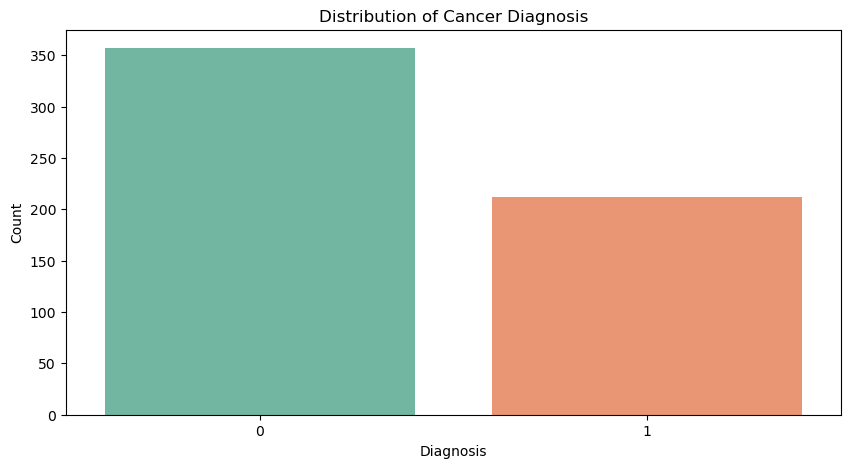

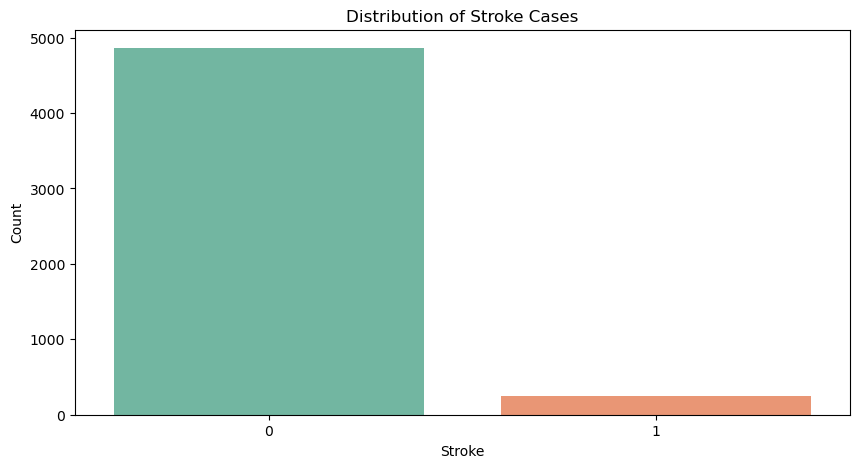

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(x='diagnosis', data=breast_cancer_df, palette='Set2')
plt.title('Distribution of Cancer Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='stroke', data=stroke_df, palette='Set2')
plt.title('Distribution of Stroke Cases')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


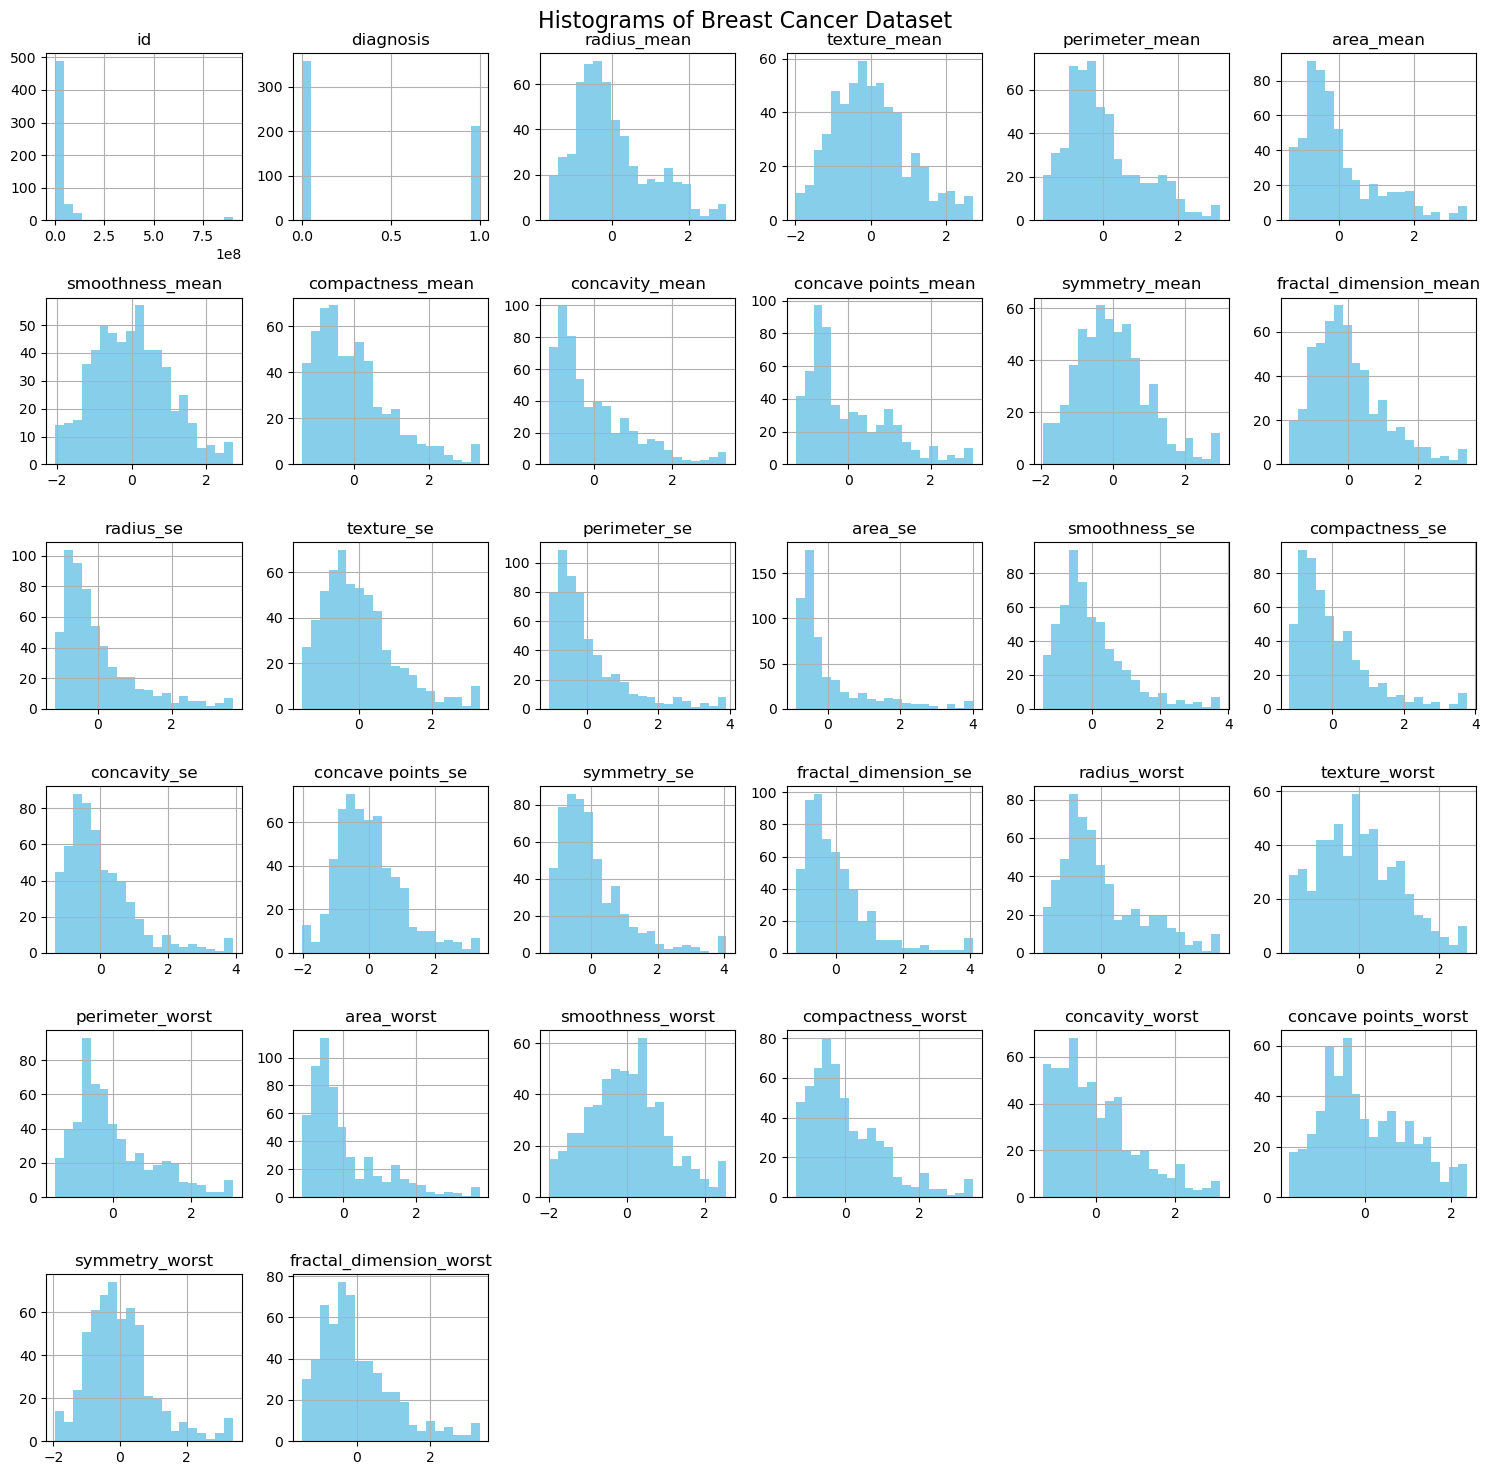

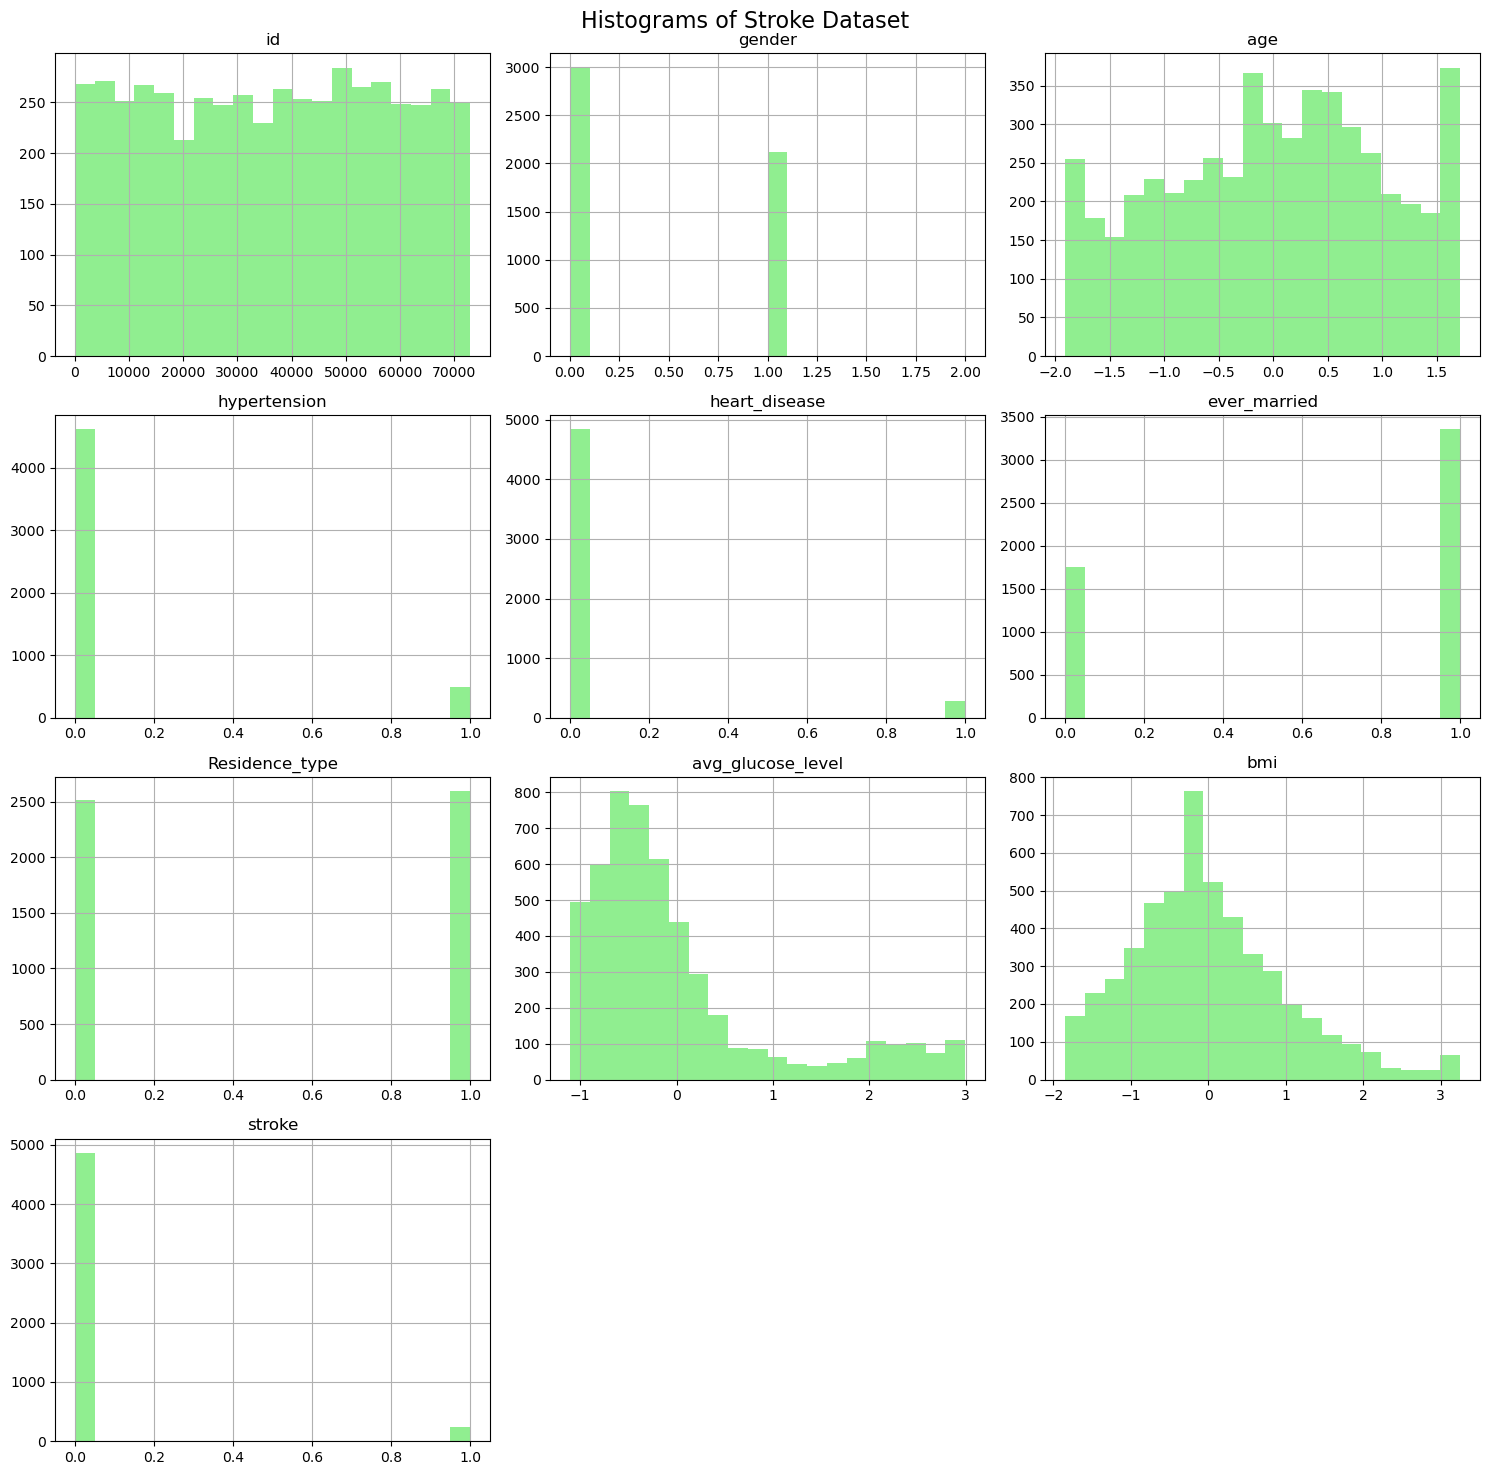

In [13]:

breast_cancer_df.hist(figsize=(15,15), bins=20, color='skyblue')
plt.suptitle('Histograms of Breast Cancer Dataset', fontsize=16)
plt.tight_layout()
plt.show()

stroke_df.hist(figsize=(15,15), bins=20, color='lightgreen')
plt.suptitle('Histograms of Stroke Dataset', fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_4140\999931266.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancer_df['radius_mean'], shade=True, color='blue', label='Radius Mean')
C:\Users\KIIT\AppData\Local\Temp\ipykernel_4140\999931266.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(breast_cancer_df['area_mean'], shade=True, color='orange', label='Area Mean')


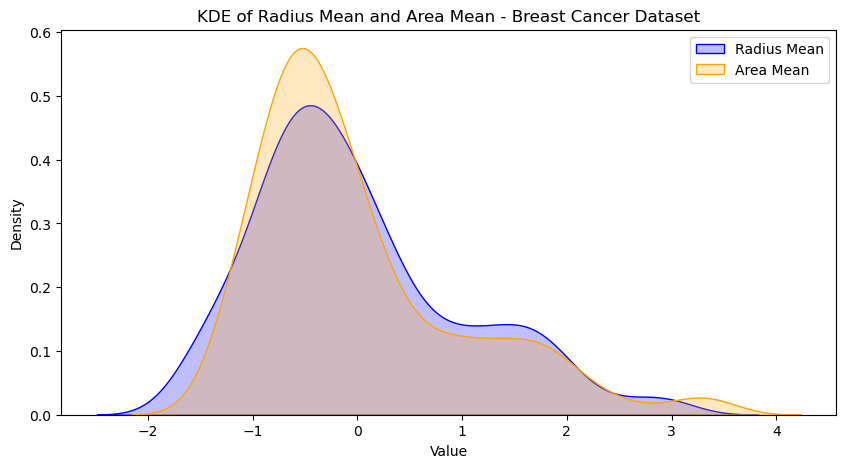

C:\Users\KIIT\AppData\Local\Temp\ipykernel_4140\999931266.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stroke_df['avg_glucose_level'], shade=True, color='green', label='Avg Glucose Level')
C:\Users\KIIT\AppData\Local\Temp\ipykernel_4140\999931266.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stroke_df['bmi'], shade=True, color='red', label='BMI')


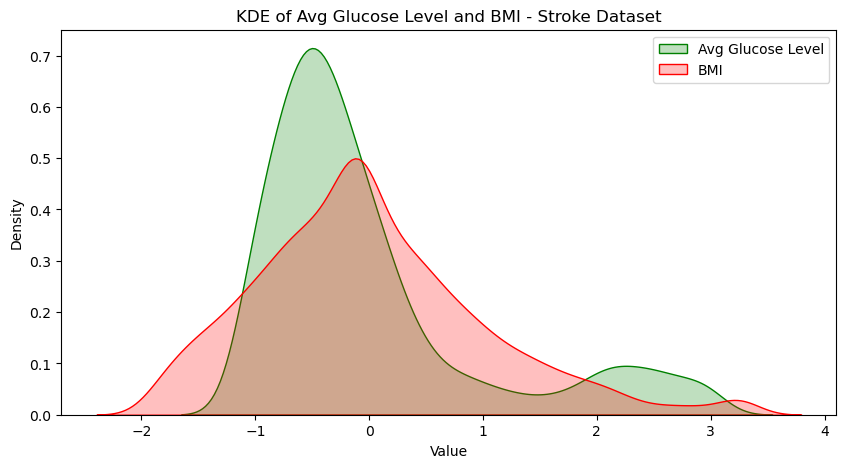

In [14]:

plt.figure(figsize=(10,5))
sns.kdeplot(breast_cancer_df['radius_mean'], shade=True, color='blue', label='Radius Mean')
sns.kdeplot(breast_cancer_df['area_mean'], shade=True, color='orange', label='Area Mean')
plt.title('KDE of Radius Mean and Area Mean - Breast Cancer Dataset')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
sns.kdeplot(stroke_df['avg_glucose_level'], shade=True, color='green', label='Avg Glucose Level')
sns.kdeplot(stroke_df['bmi'], shade=True, color='red', label='BMI')
plt.title('KDE of Avg Glucose Level and BMI - Stroke Dataset')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


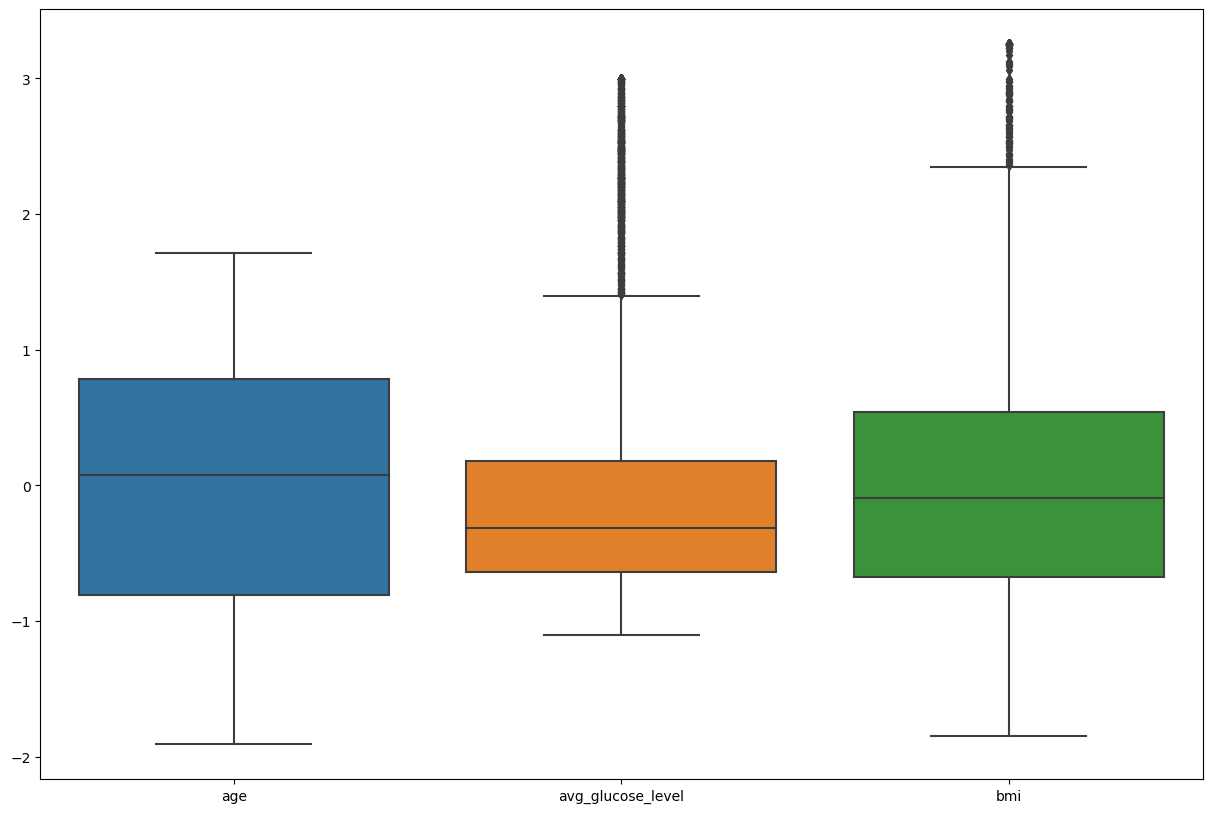

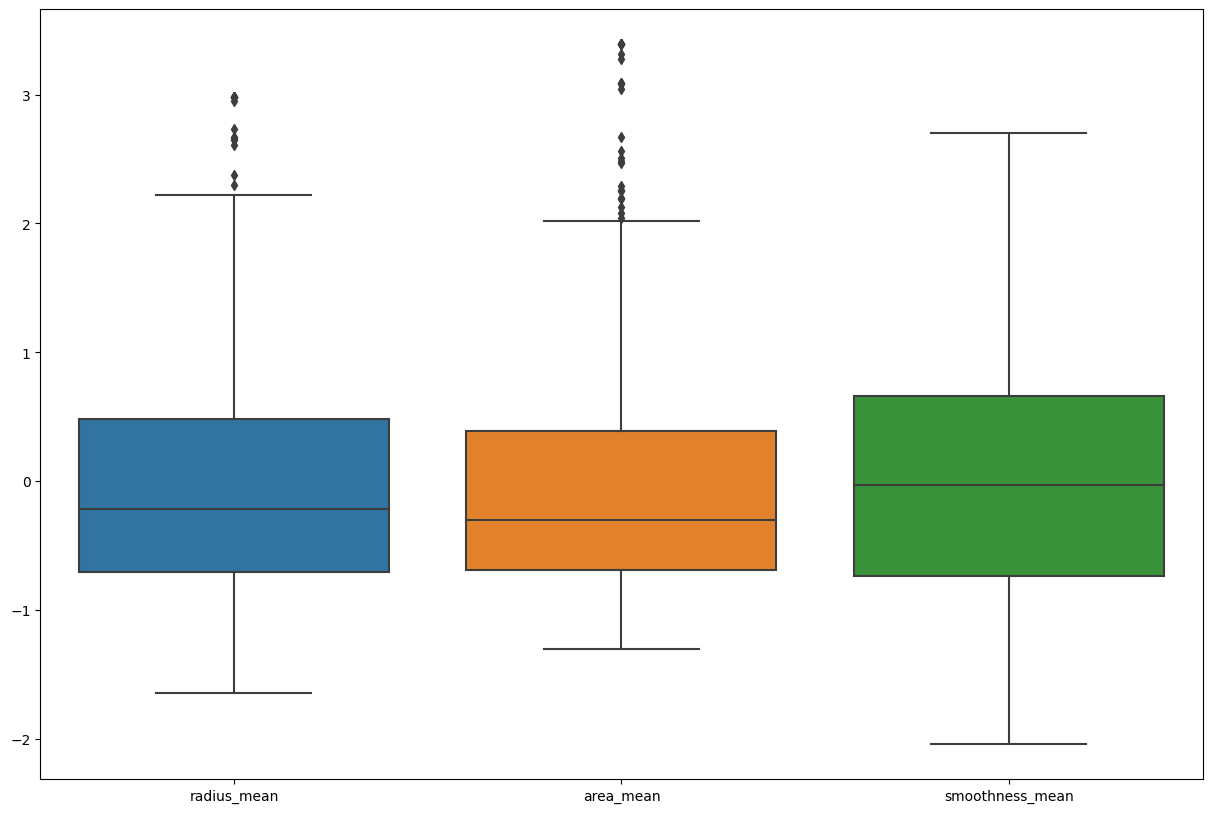

In [15]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=stroke_df[['age', 'avg_glucose_level', 'bmi']])
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=breast_cancer_df[['radius_mean', 'area_mean', 'smoothness_mean']])
plt.show()


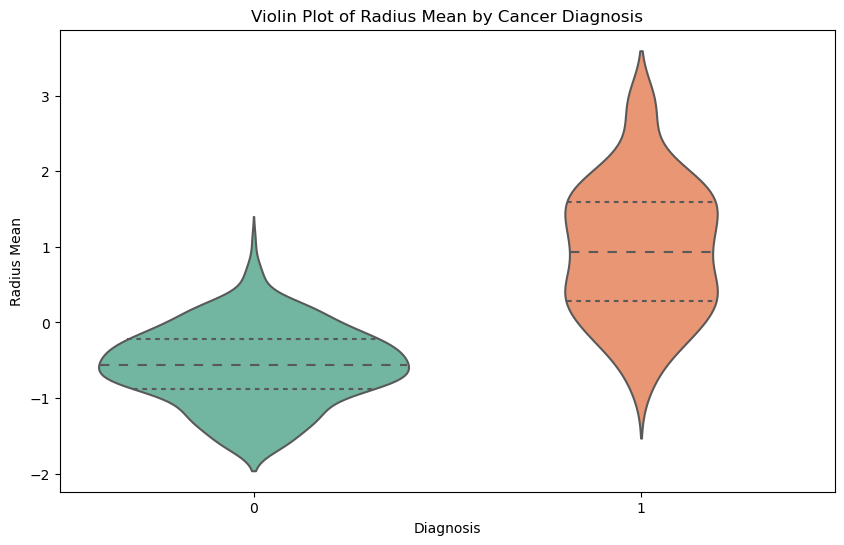

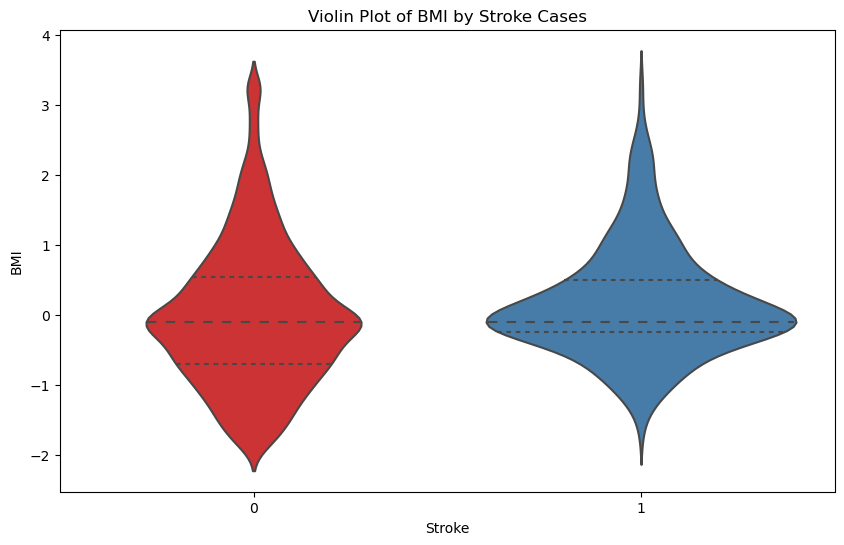

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='diagnosis', y='radius_mean', data=breast_cancer_df, split=True, inner="quartile", palette="Set2")
plt.title('Violin Plot of Radius Mean by Cancer Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='stroke', y='bmi', data=stroke_df, split=True, inner="quartile", palette="Set1")
plt.title('Violin Plot of BMI by Stroke Cases')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()


c:\Users\KIIT\Downloads\jupyter\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


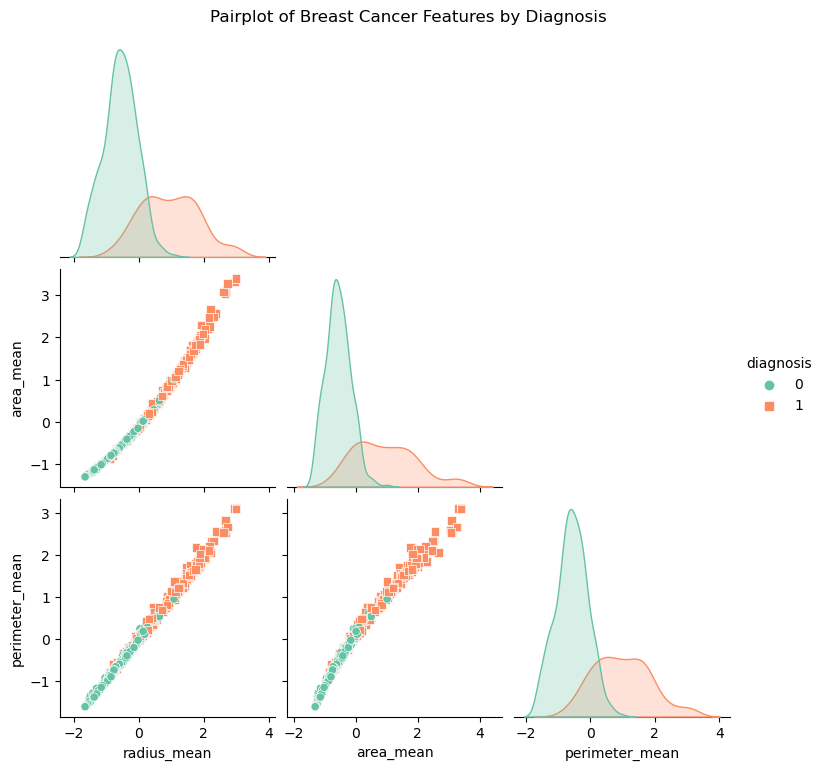

c:\Users\KIIT\Downloads\jupyter\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


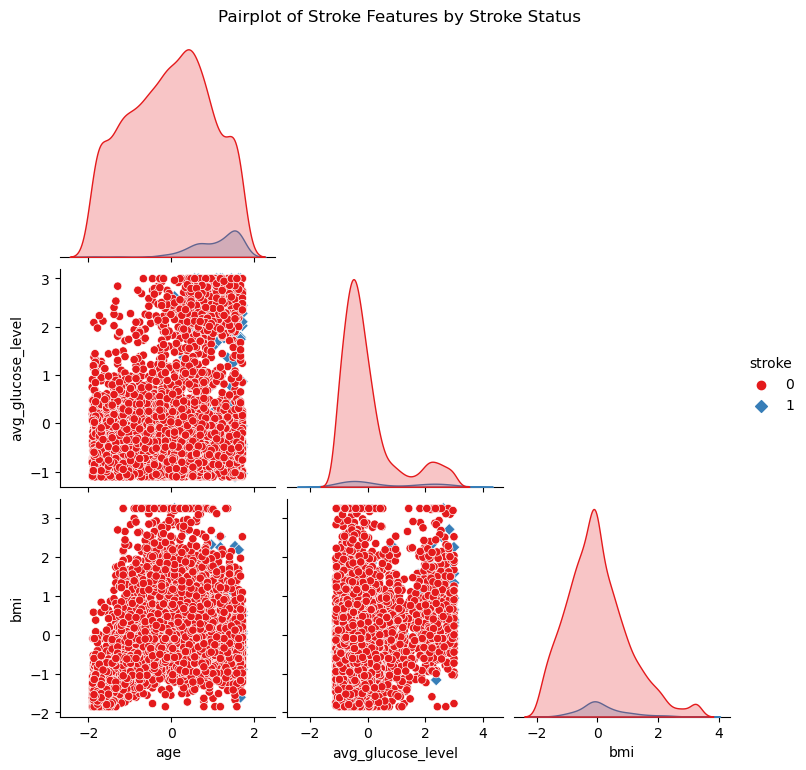

In [17]:
# Pairplot for Breast Cancer Dataset
sns.pairplot(breast_cancer_df[['radius_mean', 'area_mean', 'perimeter_mean', 'diagnosis']], hue='diagnosis', palette='Set2', corner=True, markers=["o", "s"])
plt.suptitle('Pairplot of Breast Cancer Features by Diagnosis', y=1.02)
plt.show()

# Pairplot for Stroke Dataset
sns.pairplot(stroke_df[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke', palette='Set1', corner=True, markers=["o", "D"])
plt.suptitle('Pairplot of Stroke Features by Stroke Status', y=1.02)
plt.show()


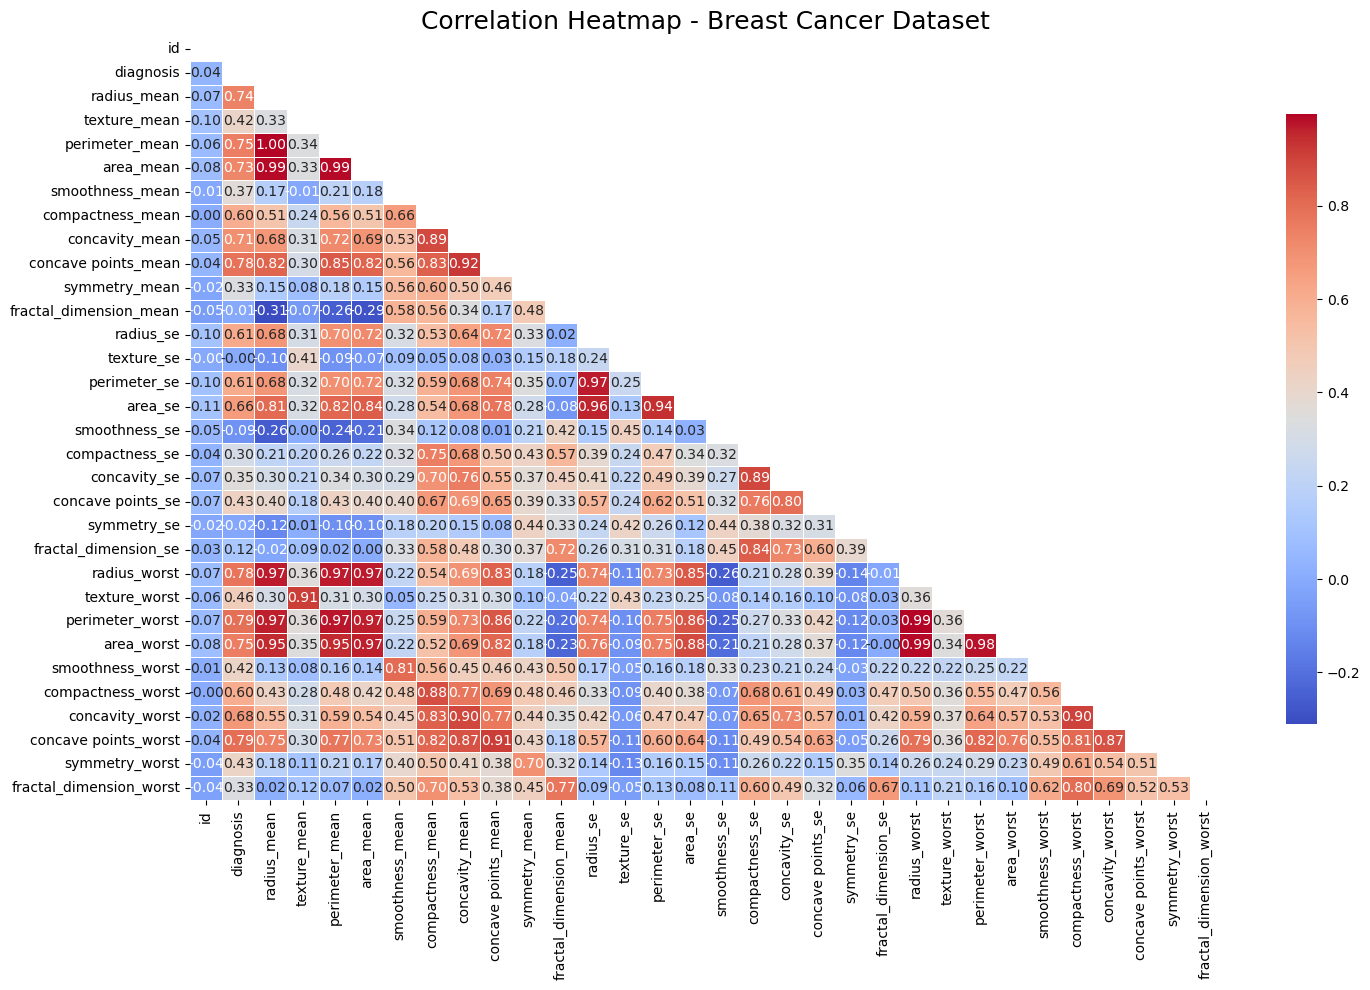

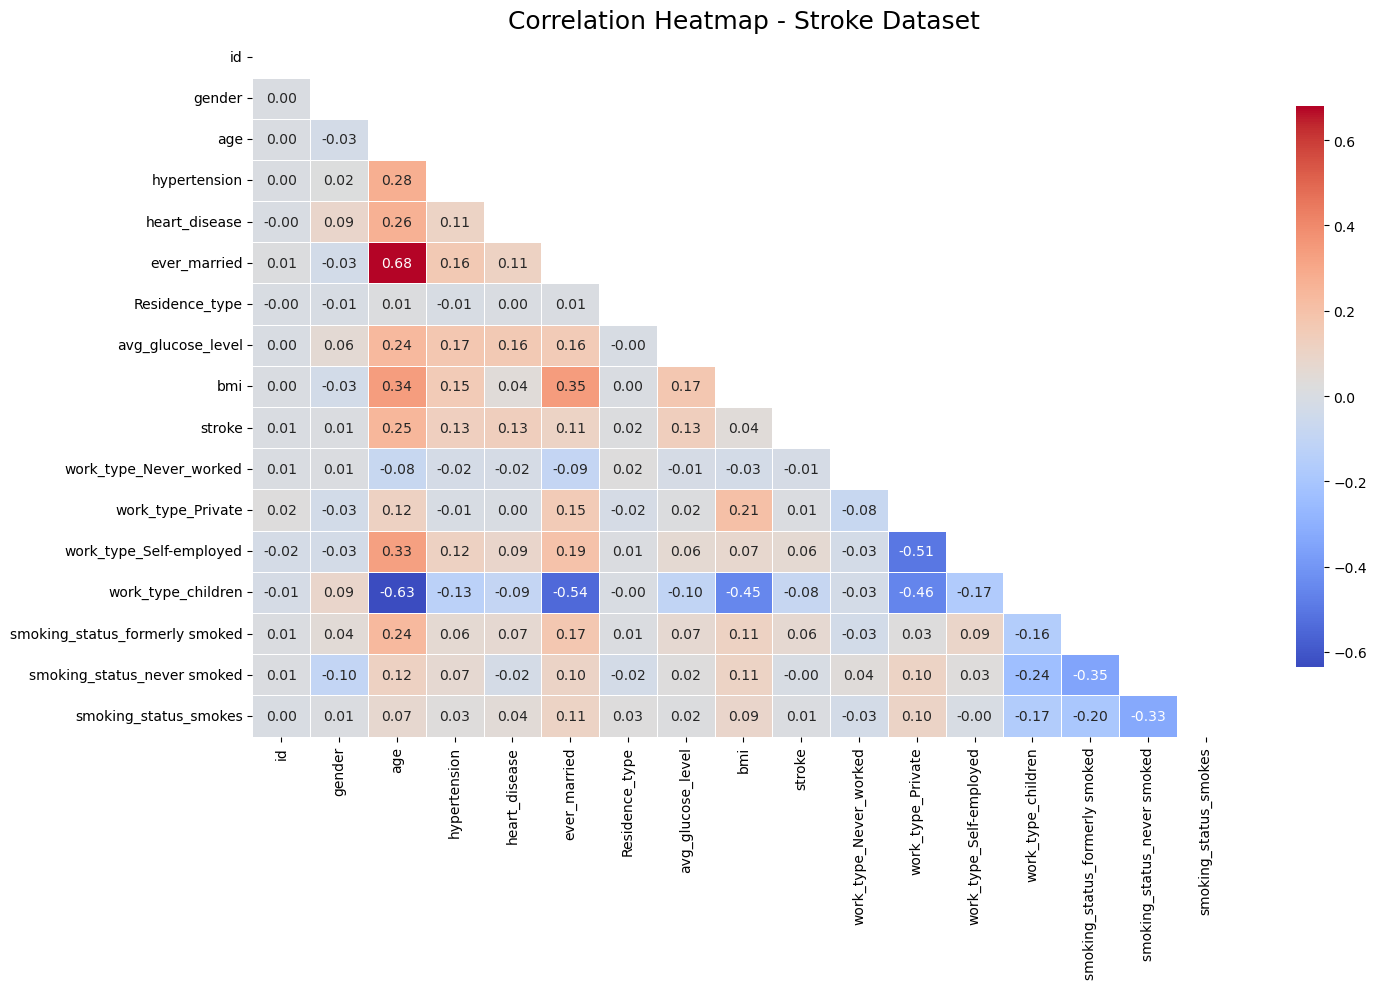

In [18]:

plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(breast_cancer_df.corr(), dtype=bool))
sns.heatmap(breast_cancer_df.corr(), annot=True, cmap='coolwarm', mask=mask, fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap - Breast Cancer Dataset', fontsize=18)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(stroke_df.corr(), dtype=bool))
sns.heatmap(stroke_df.corr(), annot=True, cmap='coolwarm', mask=mask, fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap - Stroke Dataset', fontsize=18)
plt.tight_layout()
plt.show()


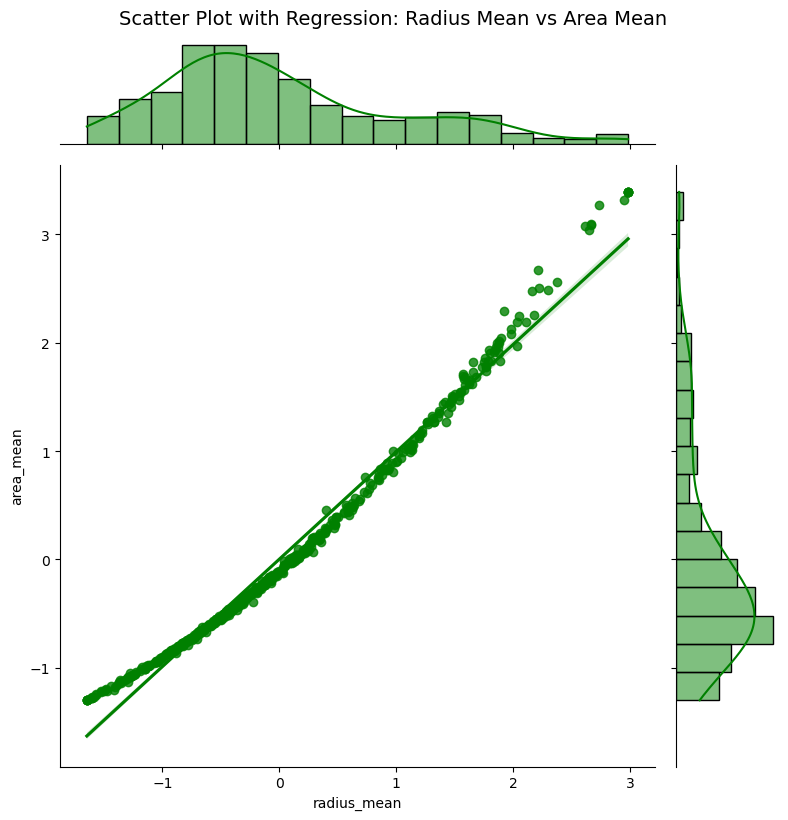

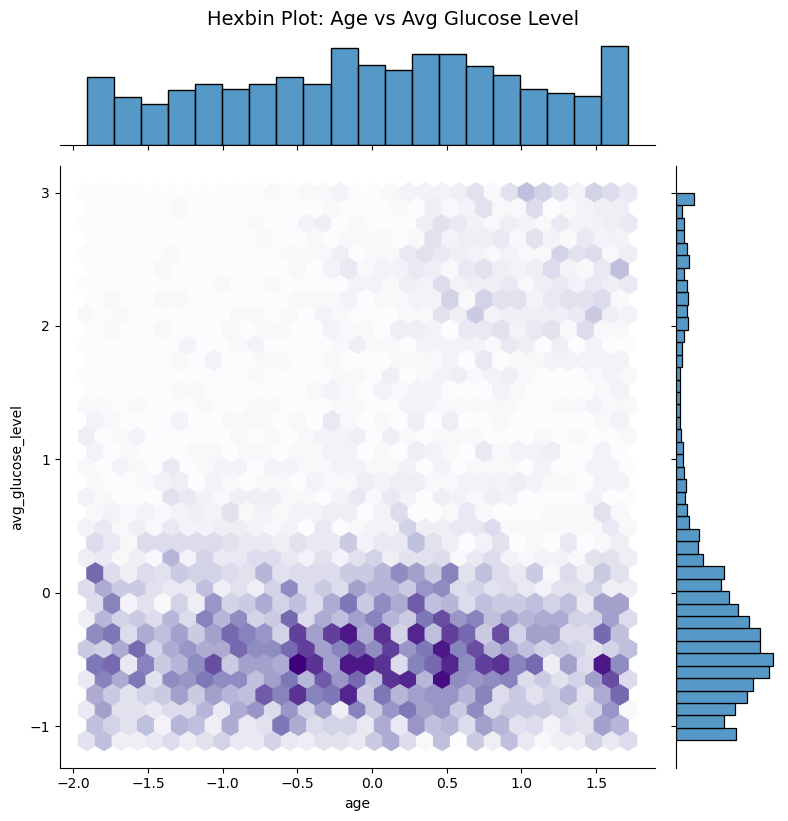

In [19]:

sns.jointplot(x='radius_mean', y='area_mean', data=breast_cancer_df, kind='reg', height=8, color='green')
plt.suptitle('Scatter Plot with Regression: Radius Mean vs Area Mean', y=1.02, fontsize=14)
plt.show()

sns.jointplot(x='age', y='avg_glucose_level', data=stroke_df, kind='hex', height=8, cmap='Purples')
plt.suptitle('Hexbin Plot: Age vs Avg Glucose Level', y=1.02, fontsize=14)
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_4140\2612348761.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='diagnosis', y='texture_mean', data=breast_cancer_df, palette='Set2', s=6)


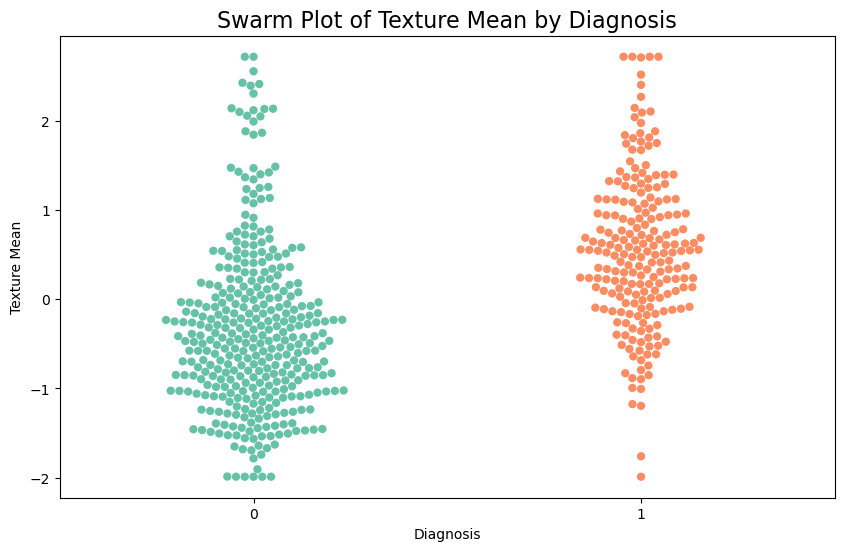

C:\Users\KIIT\AppData\Local\Temp\ipykernel_4140\2612348761.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='stroke', y='avg_glucose_level', data=stroke_df, palette='Set1', s=6)
c:\Users\KIIT\Downloads\jupyter\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 53.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\KIIT\Downloads\jupyter\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


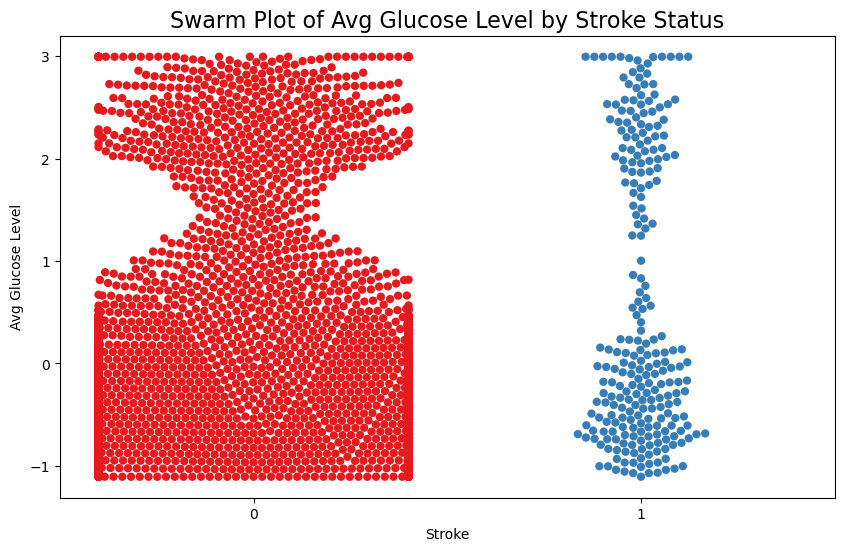

In [20]:

plt.figure(figsize=(10, 6))
sns.swarmplot(x='diagnosis', y='texture_mean', data=breast_cancer_df, palette='Set2', s=6)
plt.title('Swarm Plot of Texture Mean by Diagnosis', fontsize=16)
plt.xlabel('Diagnosis')
plt.ylabel('Texture Mean')
plt.show()

plt.figure(figsize=(10, 6))
sns.swarmplot(x='stroke', y='avg_glucose_level', data=stroke_df, palette='Set1', s=6)
plt.title('Swarm Plot of Avg Glucose Level by Stroke Status', fontsize=16)
plt.xlabel('Stroke')
plt.ylabel('Avg Glucose Level')
plt.show()


**LOGISTIC REGRESSION**

In [61]:
from sklearn.model_selection import train_test_split

breast_cancer_features = breast_cancer_df.drop(columns=['id', 'diagnosis'])
breast_cancer_target = breast_cancer_df['diagnosis']

stroke_features = stroke_df.drop(columns=['id', 'stroke'])
stroke_target = stroke_df['stroke']

X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(breast_cancer_features, breast_cancer_target, test_size=0.2, random_state=42)

X_stroke_train, X_stroke_test, y_stroke_train, y_stroke_test = train_test_split(stroke_features, stroke_target, test_size=0.2, random_state=42)


In [62]:
from sklearn.linear_model import LogisticRegression

model_bc = LogisticRegression(max_iter=1000)
model_bc.fit(X_bc_train, y_bc_train)

model_stroke = LogisticRegression(max_iter=1000)
model_stroke.fit(X_stroke_train, y_stroke_train)


LogisticRegression(max_iter=1000)

In [63]:
from sklearn.metrics import accuracy_score, classification_report

bc_predictions = model_bc.predict(X_bc_test)
stroke_predictions = model_stroke.predict(X_stroke_test)

bc_accuracy = accuracy_score(y_bc_test, bc_predictions)
stroke_accuracy = accuracy_score(y_stroke_test, stroke_predictions)

print("Breast Cancer Model Accuracy:", bc_accuracy)
print("Stroke Model Accuracy:", stroke_accuracy)

print("Breast Cancer Classification Report:\n", classification_report(y_bc_test, bc_predictions))
print("Stroke Classification Report:\n", classification_report(y_stroke_test, stroke_predictions))


Breast Cancer Model Accuracy: 0.9824561403508771
Stroke Model Accuracy: 0.9393346379647749
Breast Cancer Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Stroke Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



c:\Users\KIIT\Downloads\jupyter\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KIIT\Downloads\jupyter\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KIIT\Downloads\jupyter\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}

grid_bc = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_bc.fit(X_bc_train, y_bc_train)

best_bc_model = grid_bc.best_estimator_

grid_stroke = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_stroke.fit(X_stroke_train, y_stroke_train)

best_stroke_model = grid_stroke.best_estimator_


c:\Users\KIIT\Downloads\jupyter\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\KIIT\Downloads\jupyter\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\KIIT\Downloads\jupyter\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\KIIT\Downloads\jupyter\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\KIIT\Downloads\jupyter\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\KIIT\Downloads\jupyter\Lib\site-packages\sklearn\linear_model\_sag

In [65]:
final_bc_predictions = best_bc_model.predict(X_bc_test)
final_stroke_predictions = best_stroke_model.predict(X_stroke_test)

final_bc_accuracy = accuracy_score(y_bc_test, final_bc_predictions)
final_stroke_accuracy = accuracy_score(y_stroke_test, final_stroke_predictions)

print("Optimized Breast Cancer Model Accuracy:", final_bc_accuracy)
print("Optimized Stroke Model Accuracy:", final_stroke_accuracy)

print("Optimized Breast Cancer Classification Report:\n", classification_report(y_bc_test, final_bc_predictions))
print("Optimized Stroke Classification Report:\n", classification_report(y_stroke_test, final_stroke_predictions))


Optimized Breast Cancer Model Accuracy: 0.9824561403508771
Optimized Stroke Model Accuracy: 0.9393346379647749
Optimized Breast Cancer Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Optimized Stroke Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



c:\Users\KIIT\Downloads\jupyter\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KIIT\Downloads\jupyter\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KIIT\Downloads\jupyter\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model is perfectly fine for Breast cancer
but failing for stroke detection 

In [66]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_stroke_train), y=y_stroke_train)

model_stroke_weighted = LogisticRegression(max_iter=1000, class_weight={0: class_weights[0], 1: class_weights[1]})
model_stroke_weighted.fit(X_stroke_train, y_stroke_train)

weighted_stroke_predictions = model_stroke_weighted.predict(X_stroke_test)

weighted_stroke_accuracy = accuracy_score(y_stroke_test, weighted_stroke_predictions)

print("Weighted Stroke Model Accuracy:", weighted_stroke_accuracy)
print("Weighted Stroke Classification Report:\n", classification_report(y_stroke_test, weighted_stroke_predictions))


Weighted Stroke Model Accuracy: 0.7495107632093934
Weighted Stroke Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.17      0.79      0.28        62

    accuracy                           0.75      1022
   macro avg       0.57      0.77      0.56      1022
weighted avg       0.93      0.75      0.81      1022



In [67]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_stroke_resampled, y_stroke_resampled = smote.fit_resample(X_stroke_train, y_stroke_train)

model_stroke_smote = LogisticRegression(max_iter=1000)
model_stroke_smote.fit(X_stroke_resampled, y_stroke_resampled)

smote_stroke_predictions = model_stroke_smote.predict(X_stroke_test)

smote_stroke_accuracy = accuracy_score(y_stroke_test, smote_stroke_predictions)

print("SMOTE Stroke Model Accuracy:", smote_stroke_accuracy)
print("SMOTE Stroke Classification Report:\n", classification_report(y_stroke_test, smote_stroke_predictions))


SMOTE Stroke Model Accuracy: 0.7827788649706457
SMOTE Stroke Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.87       960
           1       0.17      0.69      0.28        62

    accuracy                           0.78      1022
   macro avg       0.58      0.74      0.58      1022
weighted avg       0.93      0.78      0.84      1022



In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_stroke_train, y_stroke_train)

best_rf_model = grid_search.best_estimator_
best_rf_predictions = best_rf_model.predict(X_stroke_test)

print("Best Random Forest Model Accuracy:", accuracy_score(y_stroke_test, best_rf_predictions))
print("Best Random Forest Classification Report:\n", classification_report(y_stroke_test, best_rf_predictions))


Best Random Forest Model Accuracy: 0.8992172211350293
Best Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       960
           1       0.22      0.26      0.24        62

    accuracy                           0.90      1022
   macro avg       0.59      0.60      0.59      1022
weighted avg       0.91      0.90      0.90      1022



In [69]:
from sklearn.metrics import roc_curve

y_scores = best_rf_model.predict_proba(X_stroke_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_stroke_test, y_scores)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

y_pred_adjusted = (y_scores >= optimal_threshold).astype(int)

print("Adjusted Random Forest Model Accuracy:", accuracy_score(y_stroke_test, y_pred_adjusted))
print("Adjusted Random Forest Classification Report:\n", classification_report(y_stroke_test, y_pred_adjusted))


Adjusted Random Forest Model Accuracy: 0.7299412915851272
Adjusted Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.72      0.83       960
           1       0.17      0.87      0.28        62

    accuracy                           0.73      1022
   macro avg       0.58      0.80      0.56      1022
weighted avg       0.94      0.73      0.80      1022



In [70]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

X = stroke_df.drop(['id', 'stroke'], axis=1)
y = stroke_df['stroke']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

selector = SelectFromModel(rf, threshold='mean', prefit=True)
X_selected = selector.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train, y_train)

y_pred_selected = rf_selected.predict(X_test)

accuracy_selected = accuracy_score(y_test, y_pred_selected)
classification_report_selected = classification_report(y_test, y_pred_selected)

print("Selected Features Model Accuracy:", accuracy_selected)
print("Selected Features Classification Report:\n", classification_report_selected)


c:\Users\KIIT\Downloads\jupyter\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected Features Model Accuracy: 0.9363992172211351
Selected Features Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.20      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.57      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022



In [90]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X_train_res, X_test, y_train_res, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 500],
    'scale_pos_weight': [1, 10, 25, 50]  
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=50, scoring='roc_auc', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train_res, y_train_res)

best_xgb = random_search.best_estimator_

y_proba = best_xgb.predict_proba(X_test)[:, 1]

threshold = 0.4  
y_pred = np.where(y_proba >= threshold, 1, 0)

accuracy = (y_pred == y_test).mean()
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Best XGBoost Model Accuracy: {accuracy}")
print(f"Best XGBoost Classification Report:\n{classification_rep}")
print(f"AUC-ROC Score: {roc_auc}")


c:\Users\KIIT\Downloads\jupyter\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:12:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Model Accuracy: 0.9311053984575836
Best XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       975
           1       0.89      0.98      0.93       970

    accuracy                           0.93      1945
   macro avg       0.94      0.93      0.93      1945
weighted avg       0.94      0.93      0.93      1945

AUC-ROC Score: 0.9895479777954005
